In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import logging
from logging.config import fileConfig
fileConfig('./faster_rcnn/logging_config.ini')
logger = logging.getLogger()

In [3]:
import os
import torchvision.transforms as transforms
from faster_rcnn.utils.dataset import CocoData
dataDir = './data/mscoco'
dataType = 'train2014'
pre_proposal_folder = './data/mscoco/coco_proposals/MCG/'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

images_dir = os.path.join(dataDir,'images', dataType)
cap = CocoData(root = images_dir,
                        annFile = annFile,
                        pre_proposal_folder=pre_proposal_folder,
                        transform=transforms.ToTensor())


/data
/data/data/mscoco
loading annotations into memory...
Done (t=9.76s)
creating index...
index created!


In [4]:
from faster_rcnn.utils.data_generator import CocoGenerator
from faster_rcnn.utils.data_generator import Enqueuer


data_gen = CocoGenerator(data=cap)
queue = Enqueuer(generator=data_gen)
queue.start()




In [5]:
t = queue.get()# print data

In [6]:
data = cap[2]

(640, 640, 3)
[37.89, 247.89, 166.87, 101.79]
[625.74, 7.13, 11.09, 144.16]
[173.59, 183.13, 414.56, 369.93]


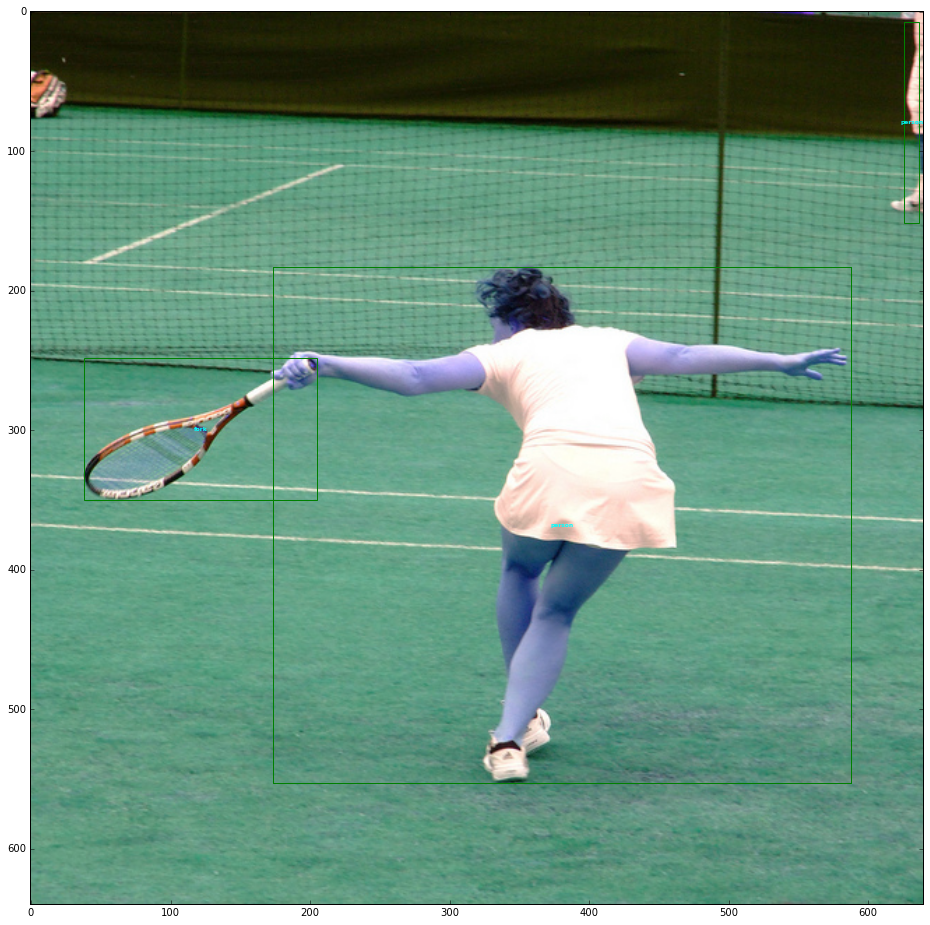

In [11]:
import matplotlib.pyplot as plt
import pylab
import cv2
import matplotlib.patches as patches

pylab.rcParams['figure.figsize'] = (20.0, 16.0)

categories = ['__background__'] + [x['name'] for x in cap.coco.loadCats(cap.coco.getCatIds())]


ann_ids = cap.coco.getAnnIds(imgIds=[546366])
im_info = cap.coco.loadImgs(546366)[0]
img_name = im_info['file_name']
anns = cap.coco.loadAnns(ann_ids)

fig,ax = plt.subplots(1)
base_path = './data/mscoco/images/train2014/'
img_path = os.path.join(base_path, img_name)
# Display the image
im_data = cv2.imread(img_path)
print im_data.shape
ax.imshow(im_data)
# Create a Rectangle patch
for i, box_anns in enumerate(anns):
    box = box_anns['bbox']
    print box
    rect = patches.Rectangle((box[0], box[1]), box[2], box[3] ,linewidth=1,edgecolor='g',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width()/2.0
    cy = ry + rect.get_height()/2.0
    
    ax.annotate(categories[box_anns['category_id']], (cx, cy), color='cyan', weight='bold', 
                fontsize=6, ha='center', va='center')


# Add the patch to the Axes
ax.add_patch(rect)    
    
plt.show()

In [8]:
import numpy as np
im_info = data['im_info']
gt_boxes = np.hstack([ data['boxes'] , data['gt_classes'][:, np.newaxis]])
print gt_boxes.shape

(896, 5)


(600, 899, 3)


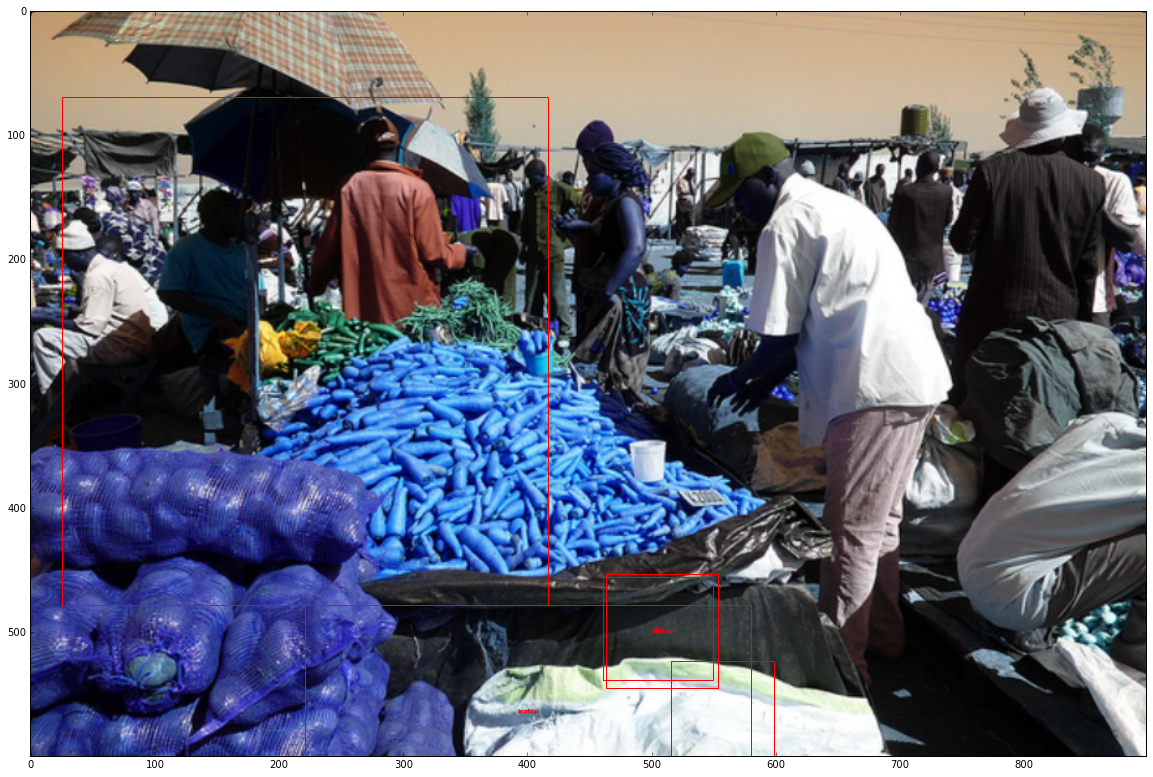

In [9]:
fig,ax = plt.subplots(1)
img_data = cv2.imread('data/mscoco/images/train2014/COCO_train2014_000000262145.jpg')
img_data = cv2.resize(img_data, None, None, fx=1.4051522, fy=1.4051522)
print img_data.shape
ax.imshow(img_data)

for i, box_anns in enumerate(gt_boxes):
    box = box_anns[:4]
    box_class = box_anns[4]
    if box_class > 0.0:
        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1] ,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        rx, ry = rect.get_xy()
        cx = rx + rect.get_width()/2.0
        cy = ry + rect.get_height()/2.0

        ax.annotate(categories[int(box_class)], (cx, cy), color='r', weight='bold', 
                    fontsize=6, ha='center', va='center')

    # Add the patch to the Axes


In [46]:
print data

{'gt_classes': array([26, 26, 52, ...,  0,  0,  0], dtype=int32), 'im_info': array([[ 600.       ,  899.       ,    1.4051522]], dtype=float32), 'dontcare_areas': array([], shape=(0, 4), dtype=float64), 'boxes': array([[ 297.89227166,   77.28337237,  370.96018735,  151.75644028],
       [  18.26697892,    1.40515222,  334.42622951,   78.68852459],
       [ 390.6323185 ,  365.33957845,  415.92505855,  399.06323185],
       ..., 
       [ 229.03981265,  181.264637  ,  397.65807963,  276.81498829],
       [ 390.6323185 ,  254.33255269,  584.54332553,  383.60655738],
       [   0.        ,   26.69789227,  341.45199063,  257.14285714]]), 'flipped': False, 'gt_ishard': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'image_info': {u'license': 2, u'file_name': u'COCO_train2014_000000262145.jpg', u'coco_url': u'http://mscoco.org/images/262145', u'height': 427, u'width': 640, u'date_captured': u'2013-11-20 02:07:55', u'flickr_url': u'http://farm8.staticflickr.com/7187/6967031859_5f08387bde_z.jpg', 